In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [2]:
# Loading the Spotify music dataset
csv_file_path = 'data.csv'
spotify_music_data = pd.read_csv(csv_file_path)

# Identifying columns that won't be used for prediction
irrelevant_columns = [
    'Track URI', 'Track Name', 'Artist URI(s)', 'Artist Name(s)',
    'Album URI', 'Album Name', 'Album Artist URI(s)', 'Album Artist Name(s)',
    'Album Release Date', 'Album Image URL', 'Label', 'Copyrights', 'Album Genres'
]
# Drop the columns
dropped = spotify_music_data.drop(columns=irrelevant_columns)
# Removing the non-essential columns
spotify_music_data = spotify_music_data.drop(columns=irrelevant_columns)

# Converting 'Explicit' from boolean to integer type
spotify_music_data['Explicit'] = spotify_music_data['Explicit'].astype(int)

# Filling missing values in numerical columns with their median
numeric_features = spotify_music_data.select_dtypes(include=['int64', 'float64']).columns
for feature in numeric_features:
    spotify_music_data[feature] = spotify_music_data[feature].fillna(spotify_music_data[feature].median())

# Filling missing values in categorical columns with their mode
categorical_features = spotify_music_data.select_dtypes(include=['object']).columns
for feature in categorical_features:
    spotify_music_data[feature] = spotify_music_data[feature].fillna(spotify_music_data[feature].mode()[0])

# Encoding categorical features
encoders_dict = {}
for feature in categorical_features:
    encoders_dict[feature] = LabelEncoder()
    spotify_music_data[feature] = encoders_dict[feature].fit_transform(spotify_music_data[feature])

# Displaying the updated structure of the dataset
spotify_music_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Disc Number          9999 non-null   int64  
 1   Track Number         9999 non-null   int64  
 2   Track Duration (ms)  9999 non-null   int64  
 3   Track Preview URL    9999 non-null   int32  
 4   Explicit             9999 non-null   int32  
 5   Popularity           9999 non-null   int64  
 6   ISRC                 9999 non-null   int32  
 7   Added By             9999 non-null   int32  
 8   Added At             9999 non-null   int32  
 9   Artist Genres        9999 non-null   int32  
 10  Danceability         9999 non-null   float64
 11  Energy               9999 non-null   float64
 12  Key                  9999 non-null   float64
 13  Loudness             9999 non-null   float64
 14  Mode                 9999 non-null   float64
 15  Speechiness          9999 non-null   f

In [3]:
# Generating descriptive statistics for the Spotify music dataset
spotify_descriptive_stats = spotify_music_data.describe()
transposed_stats = spotify_descriptive_stats.T

# Displaying the transposed descriptive statistics
transposed_stats


,count,mean,std,min,25%,50%,75%,max
Disc Number,9999.0,1.035104,0.327856,0.000000,1.0000,1.000000,1.000000,15.000
Track Number,9999.0,4.957096,5.502810,0.000000,1.0000,3.000000,7.000000,93.000
Track Duration (ms),9999.0,224814.970397,54100.116070,0.000000,192579.5000,219906.000000,250260.000000,1561133.000
Track Preview URL,9999.0,2585.813281,2151.047969,0.000000,476.0000,2038.000000,4473.500000,6888.000
Explicit,9999.0,0.050905,0.219815,0.000000,0.0000,0.000000,0.000000,1.000
Popularity,9999.0,37.624662,29.460808,0.000000,0.0000,42.000000,64.000000,98.000
ISRC,9999.0,4529.565657,2581.902382,0.000000,2287.5000,4559.000000,6757.500000,8947.000
Added By,9999.0,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000
Added At,9999.0,25.092009,83.238163,0.000000,7.0000,7.000000,7.000000,608.000
Artist Genres,9999.0,1331.395940,808.503199,0.000000,637.0000,1365.000000,2036.500000,2814.000


In [4]:
from scipy import stats

# Separating the Spotify music data into explicit and non-explicit tracks based on 'Popularity'
explicit_tracks_popularity = spotify_music_data[spotify_music_data['Explicit'] == 1]['Popularity']
non_explicit_tracks_popularity = spotify_music_data[spotify_music_data['Explicit'] == 0]['Popularity']

# Performing an independent samples t-test between the two groups
t_statistic, p_value = stats.ttest_ind(explicit_tracks_popularity, non_explicit_tracks_popularity)

print("T-statistic:", t_statistic)
print("p-value:", p_value)


T-statistic: 5.443912416334911
p-value: 5.3355913562815357e-08


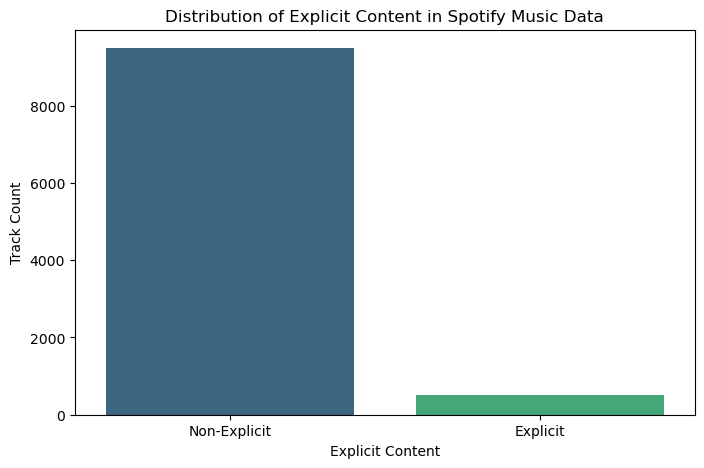

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Visualization of Explicit Content in Spotify Music Data
# Counting the number of explicit and non-explicit tracks
explicit_track_count = spotify_music_data['Explicit'].value_counts()

# Plotting
plt.figure(figsize=(8, 5))
sns.barplot(x=explicit_track_count.index, y=explicit_track_count.values, palette='viridis')
plt.title('Distribution of Explicit Content in Spotify Music Data')
plt.xlabel('Explicit Content')
plt.ylabel('Track Count')
plt.xticks(ticks=[0, 1], labels=['Non-Explicit', 'Explicit'])

# Displaying the plot
plt.show()


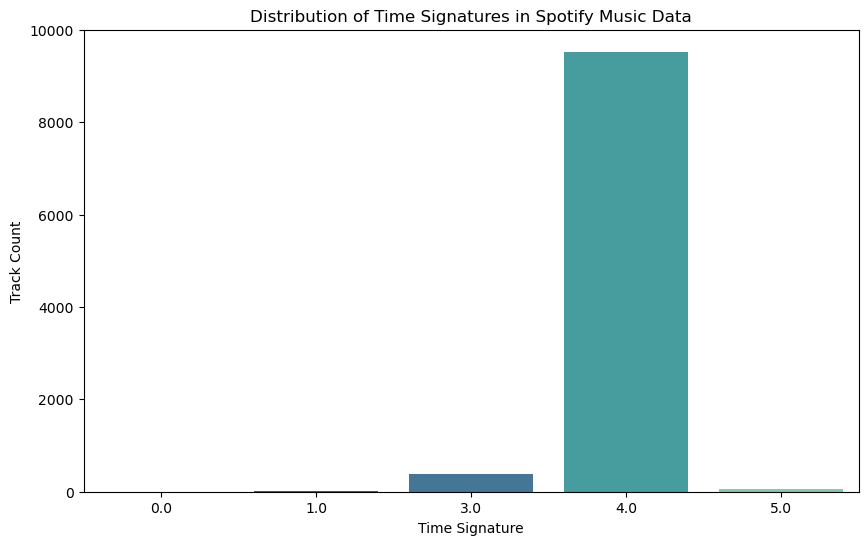

In [6]:
# 2Count the number of tracks by time signature in the Spotify music data
time_signature_counts = spotify_music_data['Time Signature'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=time_signature_counts.index, y=time_signature_counts.values, palette='mako')
plt.title('Distribution of Time Signatures in Spotify Music Data')
plt.xlabel('Time Signature')
plt.ylabel('Track Count')

# Displaying the plot
plt.show()


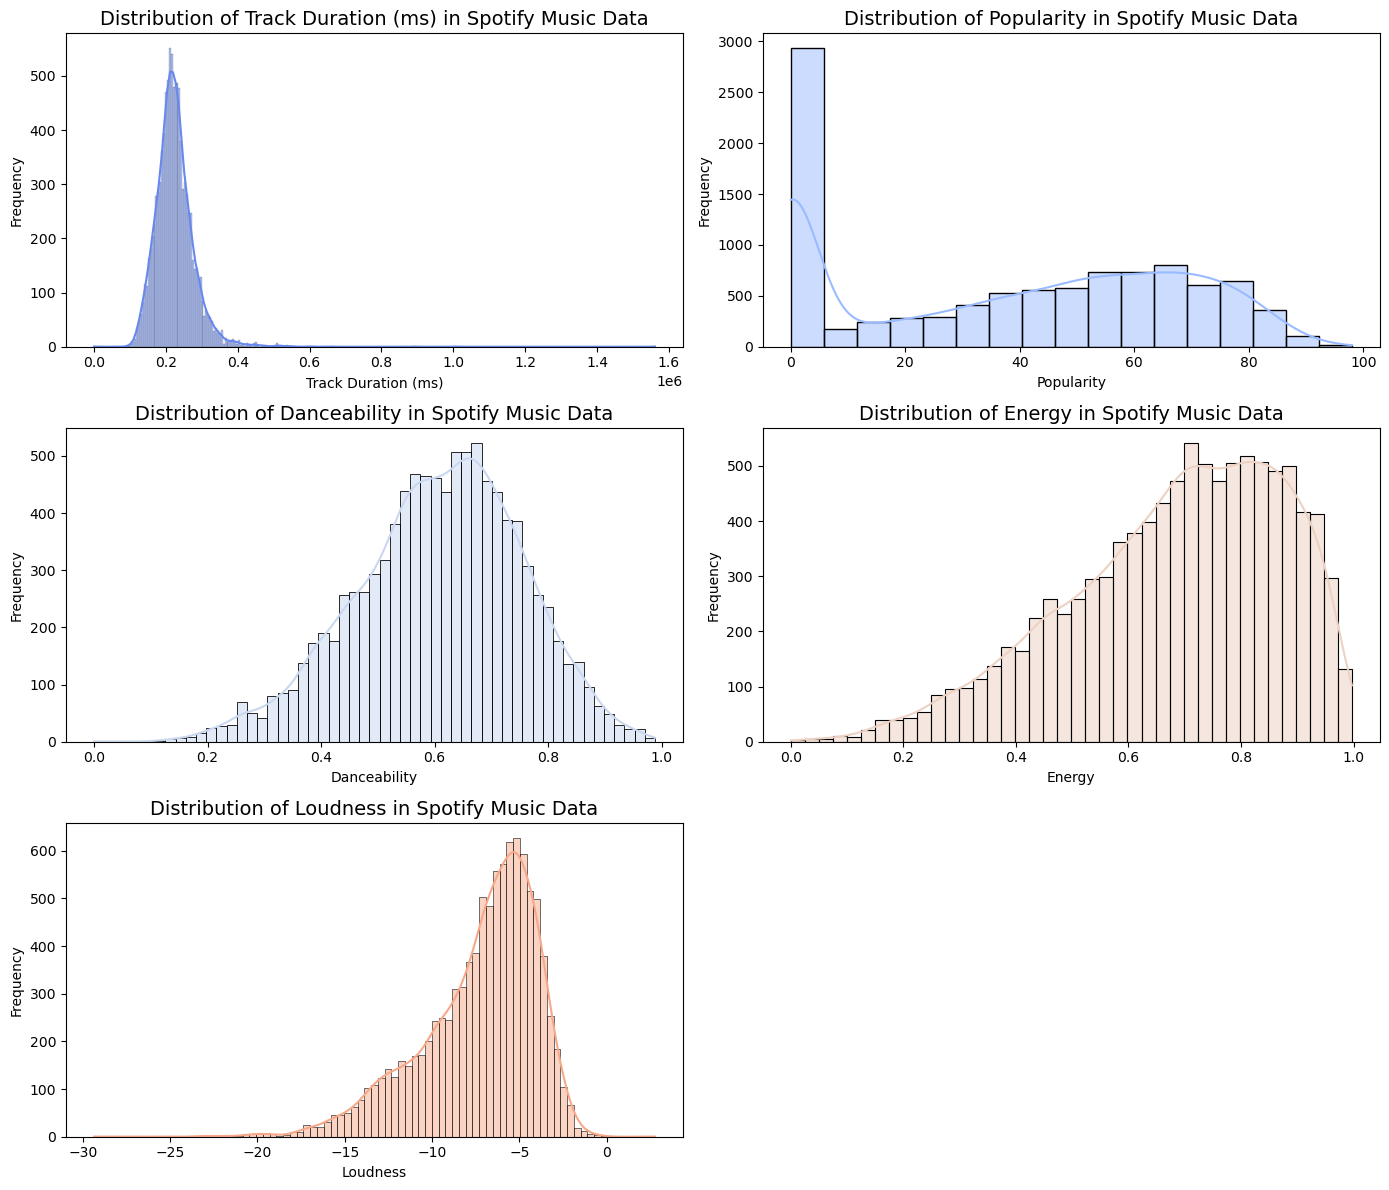

In [7]:
#3 Defining the features to be analyzed in the Spotify music data
features_for_analysis = ['Track Duration (ms)', 'Popularity', 'Danceability', 'Energy', 'Loudness']

# Plotting distribution for each feature
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 12))
axes = axes.ravel()  # Flattening the array of axes

for i, feature in enumerate(features_for_analysis):
    sns.histplot(spotify_music_data[feature], kde=True, ax=axes[i], color=sns.color_palette('coolwarm')[i])
    axes[i].set_title(f'Distribution of {feature} in Spotify Music Data', fontsize=14)
    axes[i].set_xlabel(f'{feature}')
    axes[i].set_ylabel('Frequency')

if len(features_for_analysis) % 2 != 0:
    fig.delaxes(axes[-1])

fig.tight_layout()
plt.show()


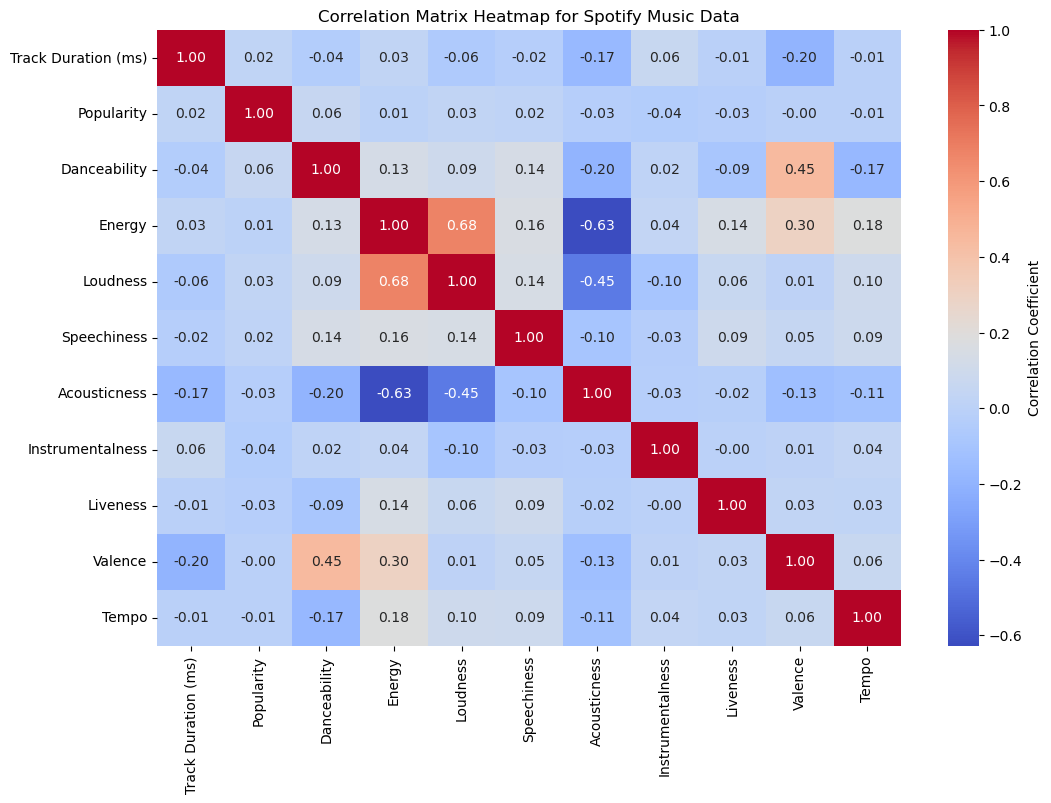

In [8]:
#4 Selecting numerical features for the correlation matrix in the Spotify music data
numerical_features_for_corr = ['Track Duration (ms)', 'Popularity', 'Danceability', 'Energy', 'Loudness', 
                               'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo']

# Calculating the correlation matrix
correlation_matrix = spotify_music_data[numerical_features_for_corr].corr()

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Matrix Heatmap for Spotify Music Data')

# Displaying the plot
plt.show()


Text(0, 0.5, 'Energy')

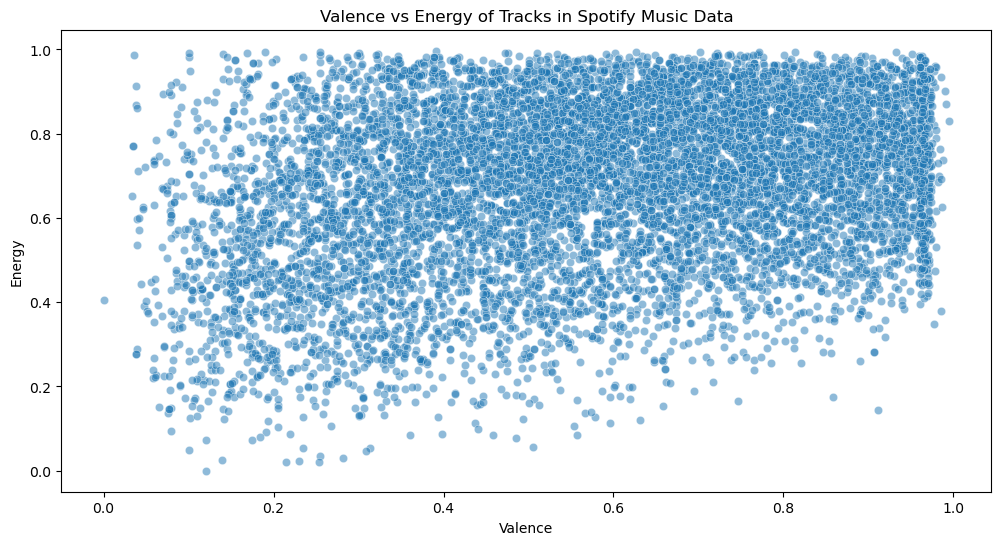

In [9]:
#5
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Valence', y='Energy', data=spotify_music_data, alpha=0.5)
plt.title('Valence vs Energy of Tracks in Spotify Music Data')
plt.xlabel('Valence')
plt.ylabel('Energy')


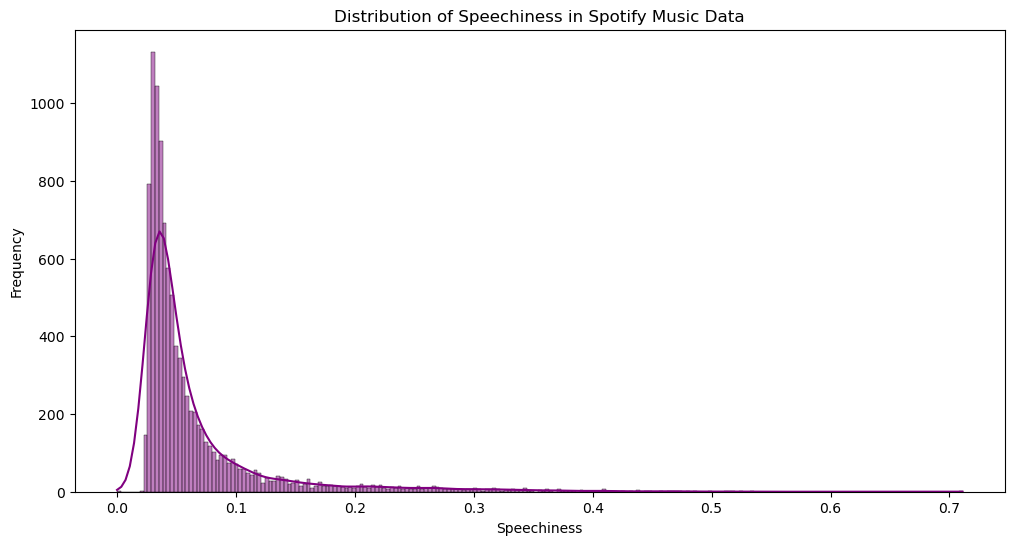

In [10]:
#6
plt.figure(figsize=(12, 6))
sns.histplot(spotify_music_data['Speechiness'], kde=True, color='purple')
plt.title('Distribution of Speechiness in Spotify Music Data')
plt.xlabel('Speechiness')
plt.ylabel('Frequency')

# Display the plot for Speechiness Distribution
plt.show()


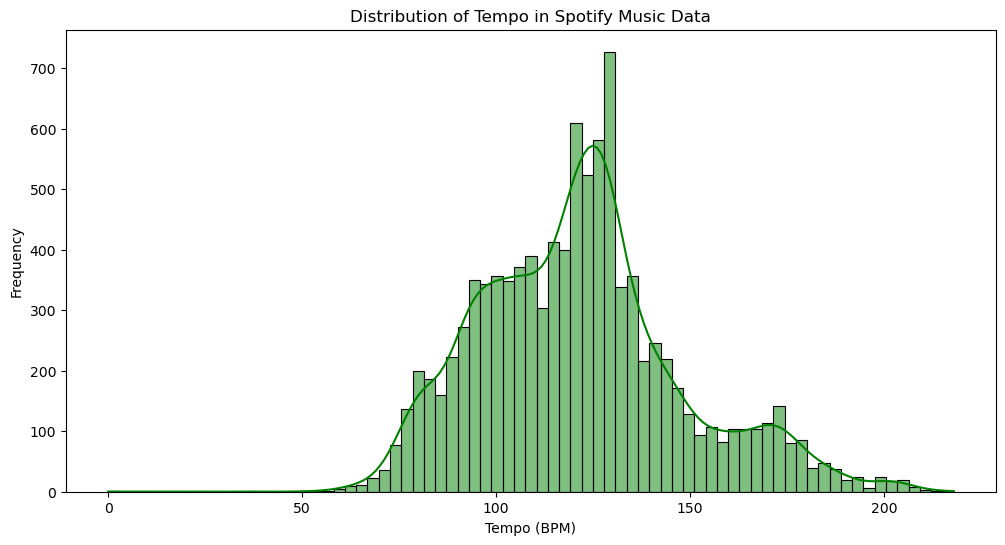

In [11]:
#7
plt.figure(figsize=(12, 6))
sns.histplot(spotify_music_data['Tempo'], kde=True, color='green')
plt.title('Distribution of Tempo in Spotify Music Data')
plt.xlabel('Tempo (BPM)')
plt.ylabel('Frequency')

# Display the plot for Tempo Distribution
plt.show()


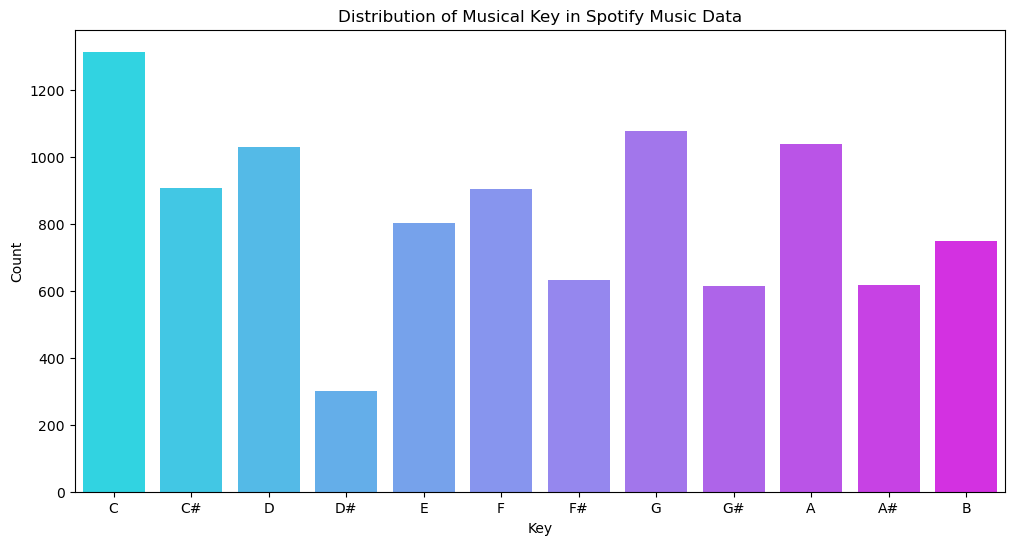

In [12]:
#8
key_counts = spotify_music_data['Key'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
sns.barplot(x=key_counts.index, y=key_counts.values, palette='cool')
plt.title('Distribution of Musical Key in Spotify Music Data')
plt.xlabel('Key')
plt.ylabel('Count')

key_labels = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']
plt.xticks(ticks=range(len(key_labels)), labels=key_labels)

# Display the plot for Key Distribution
plt.show()


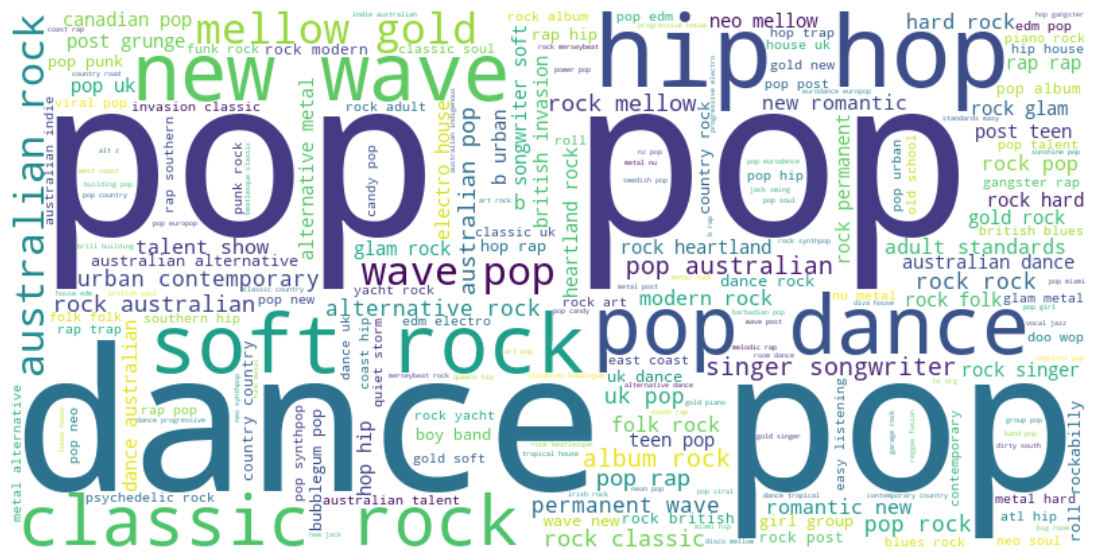

In [13]:
#9
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# Concatenating the genre strings after dropping missing values
all_genres_string = ' '.join(dropped['Artist Genres'].dropna())

# Generating the word cloud for genres in the Spotify music data
genre_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_genres_string)

# Displaying the word cloud
plt.figure(figsize=(15, 7))
plt.imshow(genre_wordcloud, interpolation='bilinear')
plt.axis('off')  # Hiding the axis
plt.show()


In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd

# Preparing the data from spotify_music_data DataFrame
X_spotify = spotify_music_data.drop('Popularity', axis=1)
y_spotify = spotify_music_data['Popularity']
X_train_spotify, X_test_spotify, y_train_spotify, y_test_spotify = train_test_split(X_spotify, y_spotify, test_size=0.2, random_state=42)

# Defining the parameter grid for hyperparameter tuning
param_grid_spotify = {
    'n_estimators': [100, 200],
    'max_features': ['sqrt'],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initializing the grid search model for RandomForestRegressor
grid_search_spotify = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                                   param_grid=param_grid_spotify,
                                   cv=3,
                                   n_jobs=-1,
                                   verbose=2)

# Performing grid search on the training data
grid_search_spotify.fit(X_train_spotify, y_train_spotify)

# Retrieving the best hyperparameters and model
best_params_spotify = grid_search_spotify.best_params_
best_rf_spotify = grid_search_spotify.best_estimator_

# Predicting on the test set with the best model
y_pred_best_spotify = best_rf_spotify.predict(X_test_spotify)

# Calculating performance metrics for the best model
mae_best_spotify = mean_absolute_error(y_test_spotify, y_pred_best_spotify)
mse_best_spotify = mean_squared_error(y_test_spotify, y_pred_best_spotify)
rmse_best_spotify = mse_best_spotify ** 0.5
r2_best_spotify = r2_score(y_test_spotify, y_pred_best_spotify)

# Extracting feature importances from the best model
feature_importances_spotify = best_rf_spotify.feature_importances_
features_df_spotify = pd.DataFrame({'Feature': X_spotify.columns, 'Importance': feature_importances_spotify})
top_10_features_spotify = features_df_spotify.sort_values(by='Importance', ascending=False).head(10)

print("Best hyperparameters:", best_params_spotify)
print("\nTop 10 features:")
print(top_10_features_spotify)
print("\nPerformance metrics:")
print(f"MAE: {mae_best_spotify}")
print(f"MSE: {mse_best_spotify}")
print(f"RMSE: {rmse_best_spotify}")
print(f"R-squared: {r2_best_spotify}")


Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best hyperparameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

Top 10 features:
                Feature  Importance
3     Track Preview URL    0.595151
5                  ISRC    0.070449
8         Artist Genres    0.036507
2   Track Duration (ms)    0.035216
15         Acousticness    0.027495
12             Loudness    0.025736
9          Danceability    0.024005
17             Liveness    0.023370
18              Valence    0.023367
14          Speechiness    0.022940

Performance metrics:
MAE: 11.400120927851358
MSE: 224.86090282261267
RMSE: 14.995362710605324
R-squared: 0.7456361528725824


In [16]:
# Select the top 10 features for the Spotify music data
top_10_features_spotify = [
    "Track Preview URL", "ISRC", "Artist Genres", "Track Duration (ms)",
    "Acousticness", "Loudness", "Danceability", "Liveness",
    "Valence", "Speechiness"
]

# Create a new DataFrame with only the top 10 features and the target variable
X_top10_spotify = spotify_music_data[top_10_features_spotify]
y_top10_spotify = spotify_music_data['Popularity']

# Split the data into training and test sets
X_train_top10_spotify, X_test_top10_spotify, y_train_top10_spotify, y_test_top10_spotify = train_test_split(
    X_top10_spotify, y_top10_spotify, test_size=0.2, random_state=42
)

# Reusing the same parameter grid as before for the top 10 features
param_grid_top10_spotify = {
    'n_estimators': [100, 200],
    'max_features': ['sqrt'],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize the grid search model for the top 10 features
grid_search_top10_spotify = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid_top10_spotify,
    cv=3,
    n_jobs=-1,
    verbose=2
)

# Perform grid search on the top 10 features
grid_search_top10_spotify.fit(X_train_top10_spotify, y_train_top10_spotify)

# Retrieve the best hyperparameters and model for top 10 features
best_params_top10_spotify = grid_search_top10_spotify.best_params_
best_rf_top10_spotify = grid_search_top10_spotify.best_estimator_

# Predict on the test set with the best model for top 10 features
y_pred_top10_best_spotify = best_rf_top10_spotify.predict(X_test_top10_spotify)

# Calculate performance metrics with the best model for top 10 features
mae_top10_best_spotify = mean_absolute_error(y_test_top10_spotify, y_pred_top10_best_spotify)
mse_top10_best_spotify = mean_squared_error(y_test_top10_spotify, y_pred_top10_best_spotify)
rmse_top10_best_spotify = mse_top10_best_spotify ** 0.5
r2_top10_best_spotify = r2_score(y_test_top10_spotify, y_pred_top10_best_spotify)

# Print the best hyperparameters and the performance metrics for top 10 features
print("Best hyperparameters for top 10 features:", best_params_top10_spotify)
print(f'Mean Absolute Error for top 10 features: {mae_top10_best_spotify}')
print(f'Mean Squared Error for top 10 features: {mse_top10_best_spotify}')
print(f'Root Mean Squared Error for top 10 features: {rmse_top10_best_spotify}')
print(f'R-squared for top 10 features: {r2_top10_best_spotify}')


Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best hyperparameters for top 10 features: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Mean Absolute Error for top 10 features: 10.74062502572556
Mean Squared Error for top 10 features: 218.33244025114075
Root Mean Squared Error for top 10 features: 14.776076619019703
R-squared for top 10 features: 0.753021184395012


In [17]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Preparing the data
X_spotify = spotify_music_data.drop('Popularity', axis=1)
y_spotify = spotify_music_data['Popularity']
X_train_spotify, X_test_spotify, y_train_spotify, y_test_spotify = train_test_split(X_spotify, y_spotify, test_size=0.2, random_state=42)

# Initialize the Support Vector Regression model
svr_model_spotify = SVR()

# Define a range of parameters for hyperparameter tuning
param_grid_svr_spotify = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': ['scale', 'auto'],  # Kernel coefficient
    'epsilon': [0.01, 0.1, 1, 10]  # Epsilon in the epsilon-SVR model
}

# Initialize GridSearchCV for hyperparameter tuning
grid_search_svr_spotify = GridSearchCV(svr_model_spotify, param_grid_svr_spotify, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the GridSearchCV to the training data
grid_search_svr_spotify.fit(X_train_spotify, y_train_spotify)

# Best parameters
best_params_svr_spotify = grid_search_svr_spotify.best_params_

# Best model after hyperparameter tuning
best_svr_model_spotify = grid_search_svr_spotify.best_estimator_

# Predict on the test data
y_pred_svr_spotify = best_svr_model_spotify.predict(X_test_spotify)

# Calculate performance metrics for SVR
mae_svr_spotify = mean_absolute_error(y_test_spotify, y_pred_svr_spotify)
mse_svr_spotify = mean_squared_error(y_test_spotify, y_pred_svr_spotify)
rmse_svr_spotify = mse_svr_spotify ** 0.5
r2_svr_spotify = r2_score(y_test_spotify, y_pred_svr_spotify)

# Print performance metrics
print(f"Best Parameters: {best_params_svr_spotify}")
print(f"MAE: {mae_svr_spotify}")
print(f"MSE: {mse_svr_spotify}")
print(f"RMSE: {rmse_svr_spotify}")
print(f"R-squared: {r2_svr_spotify}")


Best Parameters: {'C': 100, 'epsilon': 1, 'gamma': 'scale'}
MAE: 21.494757684618474
MSE: 644.3514218058892
RMSE: 25.384078116131956
R-squared: 0.2711062505967795


In [18]:
# Define the top 10 features for Spotify music data
top_10_features_spotify = [
    "Track Preview URL", "ISRC", "Artist Genres", "Track Duration (ms)",
    "Acousticness", "Loudness", "Danceability", "Liveness",
    "Valence", "Speechiness"
]

# Create a new DataFrame with only the top 10 features
X_spotify = spotify_music_data[top_10_features_spotify]
y_spotify = spotify_music_data['Popularity']  # Target variable

# Split the data into training and test sets
X_train_spotify, X_test_spotify, y_train_spotify, y_test_spotify = train_test_split(X_spotify, y_spotify, test_size=0.2, random_state=42)

# Define a range of parameters for the SVR model
param_grid_svr_spotify = {
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 1, 10],
    'gamma': ['scale', 'auto']
}

# Initialize the SVR model
svr_model_spotify = SVR()

# Initialize GridSearchCV for hyperparameter tuning
grid_search_svr_spotify = GridSearchCV(svr_model_spotify, param_grid_svr_spotify, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)

# Fit the GridSearchCV to the training data
grid_search_svr_spotify.fit(X_train_spotify, y_train_spotify)

# Best parameters from the grid search
best_params_svr_spotify = grid_search_svr_spotify.best_params_

# Best SVR model after hyperparameter tuning
best_svr_model_spotify = grid_search_svr_spotify.best_estimator_

# Predict on the test set using the best SVR model
y_pred_svr_spotify = best_svr_model_spotify.predict(X_test_spotify)

# Calculate performance metrics for the best SVR model
mae_svr_spotify = mean_absolute_error(y_test_spotify, y_pred_svr_spotify)
mse_svr_spotify = mean_squared_error(y_test_spotify, y_pred_svr_spotify)
rmse_svr_spotify = mse_svr_spotify ** 0.5
r2_svr_spotify = r2_score(y_test_spotify, y_pred_svr_spotify)

# Print the best parameters and performance metrics for the top 10 features
print(f"Best Parameters for top 10 features: {best_params_svr_spotify}")
print(f"MAE for top 10 features: {mae_svr_spotify}")
print(f"MSE for top 10 features: {mse_svr_spotify}")
print(f"RMSE for top 10 features: {rmse_svr_spotify}")
print(f"R^2 for top 10 features: {r2_svr_spotify}")


Fitting 3 folds for each of 32 candidates, totalling 96 fits
Best Parameters for top 10 features: {'C': 100, 'epsilon': 1, 'gamma': 'scale'}
MAE for top 10 features: 21.45912398846722
MSE for top 10 features: 645.5118208759162
RMSE for top 10 features: 25.406924663876897
R^2 for top 10 features: 0.26979360100785577


In [19]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Preparing the data
X_spotify = spotify_music_data.drop('Popularity', axis=1)
y_spotify = spotify_music_data['Popularity']
X_train_spotify, X_test_spotify, y_train_spotify, y_test_spotify = train_test_split(X_spotify, y_spotify, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting Regressor model
gbr_model_spotify = GradientBoostingRegressor()

# Define a range of parameters for hyperparameter tuning
param_grid_gbr_spotify = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2', None]
}

# Initialize GridSearchCV for hyperparameter tuning
grid_search_gbr_spotify = GridSearchCV(gbr_model_spotify, param_grid_gbr_spotify, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the GridSearchCV to the training data
grid_search_gbr_spotify.fit(X_train_spotify, y_train_spotify)

# Best parameters from the grid search
best_params_gbr_spotify = grid_search_gbr_spotify.best_params_

# Best Gradient Boosting Regressor model after hyperparameter tuning
best_gbr_model_spotify = grid_search_gbr_spotify.best_estimator_

# Predict on the test set using the best model
y_pred_gbr_spotify = best_gbr_model_spotify.predict(X_test_spotify)

# Calculate performance metrics for Gradient Boosting Regressor
mae_gbr_spotify = mean_absolute_error(y_test_spotify, y_pred_gbr_spotify)
mse_gbr_spotify = mean_squared_error(y_test_spotify, y_pred_gbr_spotify)
rmse_gbr_spotify = mse_gbr_spotify ** 0.5
r2_gbr_spotify = r2_score(y_test_spotify, y_pred_gbr_spotify)

# Print the best parameters and performance metrics
print(f"Best Parameters for Gradient Boosting: {best_params_gbr_spotify}")
print(f"MAE for Gradient Boosting: {mae_gbr_spotify}")
print(f"MSE for Gradient Boosting: {mse_gbr_spotify}")
print(f"RMSE for Gradient Boosting: {rmse_gbr_spotify}")
print(f"R-squared for Gradient Boosting: {r2_gbr_spotify}")


Best Parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
MAE for Gradient Boosting: 10.085208981733745
MSE for Gradient Boosting: 202.57866684898025
RMSE for Gradient Boosting: 14.233013273688051
R-squared for Gradient Boosting: 0.7708419365090792


In [20]:
# Select only the top 10 features for X from Spotify music data
X_top10_spotify = spotify_music_data[top_10_features_spotify]
y_top10_spotify = spotify_music_data['Popularity']

# Split the data into training and testing sets
X_train_top10_spotify, X_test_top10_spotify, y_train_top10_spotify, y_test_top10_spotify = train_test_split(X_top10_spotify, y_top10_spotify, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting Regressor model for the top 10 features
gbr_model_top10_spotify = GradientBoostingRegressor()

# Use the same parameter grid as before for the top 10 features
param_grid_gbr_top10_spotify = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2', None]
}

# Initialize GridSearchCV for hyperparameter tuning with the top 10 features
grid_search_gbr_top10_spotify = GridSearchCV(gbr_model_top10_spotify, param_grid_gbr_top10_spotify, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the GridSearchCV to the training data with the top 10 features
grid_search_gbr_top10_spotify.fit(X_train_top10_spotify, y_train_top10_spotify)

# Best parameters for the top 10 features
best_params_gbr_top10_spotify = grid_search_gbr_top10_spotify.best_params_

# Best model after hyperparameter tuning with the top 10 features
best_gbr_model_top10_spotify = grid_search_gbr_top10_spotify.best_estimator_

# Predict on the test data with the top 10 features
y_pred_gbr_top10_spotify = best_gbr_model_top10_spotify.predict(X_test_top10_spotify)

# Calculate performance metrics for Gradient Boosting Regressor with the top 10 features
mae_gbr_top10_spotify = mean_absolute_error(y_test_top10_spotify, y_pred_gbr_top10_spotify)
mse_gbr_top10_spotify = mean_squared_error(y_test_top10_spotify, y_pred_gbr_top10_spotify)
rmse_gbr_top10_spotify = mse_gbr_top10_spotify ** 0.5
r2_gbr_top10_spotify = r2_score(y_test_top10_spotify, y_pred_gbr_top10_spotify)

# Print performance metrics for the top 10 features
print(f"Best Parameters for top 10 features: {best_params_gbr_top10_spotify}")
print(f"MAE for top 10 features: {mae_gbr_top10_spotify}")
print(f"MSE for top 10 features: {mse_gbr_top10_spotify}")
print(f"RMSE for top 10 features: {rmse_gbr_top10_spotify}")
print(f"R-squared for top 10 features: {r2_gbr_top10_spotify}")


Best Parameters for top 10 features: {'learning_rate': 0.1, 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 100}
MAE for top 10 features: 10.36892203809386
MSE for top 10 features: 212.12546256310236
RMSE for top 10 features: 14.564527543422146
R-squared for top 10 features: 0.7600425505104411


In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Preparing the dataset
X_spotify = spotify_music_data.drop('Popularity', axis=1) 
y_spotify = spotify_music_data['Popularity']
X_train_spotify, X_test_spotify, y_train_spotify, y_test_spotify = train_test_split(X_spotify, y_spotify, test_size=0.2, random_state=42)

# Ridge Regression
ridge_alphas = [1e-3, 1e-2, 1e-1, 1, 10, 100]
ridge_model_cv_spotify = RidgeCV(alphas=ridge_alphas, cv=5)
ridge_model_cv_spotify.fit(X_train_spotify, y_train_spotify)
y_pred_ridge_spotify = ridge_model_cv_spotify.predict(X_test_spotify)
mae_ridge_spotify = mean_absolute_error(y_test_spotify, y_pred_ridge_spotify)
mse_ridge_spotify = mean_squared_error(y_test_spotify, y_pred_ridge_spotify)
rmse_ridge_spotify = mse_ridge_spotify ** 0.5
r2_ridge_spotify = r2_score(y_test_spotify, y_pred_ridge_spotify)

# Print performance metrics
print("Ridge Regression:")
print(f"Alpha: {ridge_model_cv_spotify.alpha_}")
print(f"MAE: {mae_ridge_spotify}")
print(f"MSE: {mse_ridge_spotify}")
print(f"RMSE: {rmse_ridge_spotify}")
print(f"R-squared: {r2_ridge_spotify}")

C:\Users\Ashi\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=5.1707e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\Ashi\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=5.11918e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\Ashi\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=5.61752e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\Ashi\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=5.00775e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\Ashi\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:200: Lin

Ridge Regression:
Alpha: 10.0
MAE: 21.45790999047969
MSE: 624.8574637451431
RMSE: 24.997149112351654
R-squared: 0.2931579194544093


In [22]:
X_top10_spotify = spotify_music_data[top_10_features_spotify]
y_top10_spotify = spotify_music_data['Popularity']

# Split the data into training and test sets for the top 10 features
X_train_top10_spotify, X_test_top10_spotify, y_train_top10_spotify, y_test_top10_spotify = train_test_split(X_top10_spotify, y_top10_spotify, test_size=0.2, random_state=42)

# Ridge Regression with top 10 features
ridge_model_cv_top10_spotify = RidgeCV(alphas=ridge_alphas, cv=5)
ridge_model_cv_top10_spotify.fit(X_train_top10_spotify, y_train_top10_spotify)
y_pred_ridge_top10_spotify = ridge_model_cv_top10_spotify.predict(X_test_top10_spotify)
mae_ridge_top10_spotify = mean_absolute_error(y_test_top10_spotify, y_pred_ridge_top10_spotify)
mse_ridge_top10_spotify = mean_squared_error(y_test_top10_spotify, y_pred_ridge_top10_spotify)
rmse_ridge_top10_spotify = mse_ridge_top10_spotify ** 0.5
r2_ridge_top10_spotify = r2_score(y_test_top10_spotify, y_pred_ridge_top10_spotify)

# Print performance metrics for the top 10 features
print("Ridge Regression with top 10 features:")
print(f"Alpha: {ridge_model_cv_top10_spotify.alpha_}")
print(f"MAE: {mae_ridge_top10_spotify}")
print(f"MSE: {mse_ridge_top10_spotify}")
print(f"RMSE: {rmse_ridge_top10_spotify}")
print(f"R-squared: {r2_ridge_top10_spotify}")

Ridge Regression with top 10 features:
Alpha: 1.0
MAE: 21.801307950756048
MSE: 641.4306060517979
RMSE: 25.3264803328808
R-squared: 0.27441029288530117


In [23]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Preparing the dataset
X_spotify = spotify_music_data.drop('Popularity', axis=1) 
y_spotify = spotify_music_data['Popularity']
X_train_spotify, X_test_spotify, y_train_spotify, y_test_spotify = train_test_split(X_spotify, y_spotify, test_size=0.2, random_state=42)

# Lasso Regression
lasso_alphas = [1e-3, 1e-2, 1e-1, 1, 10, 100]
lasso_model_cv_spotify = LassoCV(alphas=lasso_alphas, cv=5, random_state=42)
lasso_model_cv_spotify.fit(X_train_spotify, y_train_spotify)
y_pred_lasso_spotify = lasso_model_cv_spotify.predict(X_test_spotify)
mae_lasso_spotify = mean_absolute_error(y_test_spotify, y_pred_lasso_spotify)
mse_lasso_spotify = mean_squared_error(y_test_spotify, y_pred_lasso_spotify)
rmse_lasso_spotify = mse_lasso_spotify ** 0.5
r2_lasso_spotify = r2_score(y_test_spotify, y_pred_lasso_spotify)

# Print performance metrics
print("Lasso Regression:")
print(f"Alpha: {lasso_model_cv_spotify.alpha_}")
print(f"MAE: {mae_lasso_spotify}")
print(f"MSE: {mse_lasso_spotify}")
print(f"RMSE: {rmse_lasso_spotify}")
print(f"R-squared: {r2_lasso_spotify}")


Lasso Regression:
Alpha: 0.01
MAE: 21.463667033568694
MSE: 625.0424125360279
RMSE: 25.00084823633046
R-squared: 0.2929487044002115


In [24]:
X_top10_spotify = spotify_music_data[top_10_features_spotify]
y_top10_spotify = spotify_music_data['Popularity']

# Split the data into training and test sets for the top 10 features
X_train_top10_spotify, X_test_top10_spotify, y_train_top10_spotify, y_test_top10_spotify = train_test_split(X_top10_spotify, y_top10_spotify, test_size=0.2, random_state=42)

# Lasso Regression with top 10 features
lasso_model_cv_top10_spotify = LassoCV(alphas=lasso_alphas, cv=5, random_state=42)
lasso_model_cv_top10_spotify.fit(X_train_top10_spotify, y_train_top10_spotify)
y_pred_lasso_top10_spotify = lasso_model_cv_top10_spotify.predict(X_test_top10_spotify)
mae_lasso_top10_spotify = mean_absolute_error(y_test_top10_spotify, y_pred_lasso_top10_spotify)
mse_lasso_top10_spotify = mean_squared_error(y_test_top10_spotify, y_pred_lasso_top10_spotify)
rmse_lasso_top10_spotify = mse_lasso_top10_spotify ** 0.5
r2_lasso_top10_spotify = r2_score(y_test_top10_spotify, y_pred_lasso_top10_spotify)

# Print performance metrics for the top 10 features
print("Lasso Regression with top 10 features:")
print(f"Alpha: {lasso_model_cv_top10_spotify.alpha_}")
print(f"MAE for top 10 features: {mae_lasso_top10_spotify}")
print(f"MSE for top 10 features: {mse_lasso_top10_spotify}")
print(f"RMSE for top 10 features: {rmse_lasso_top10_spotify}")
print(f"R-squared for top 10 features: {r2_lasso_top10_spotify}")

Lasso Regression with top 10 features:
Alpha: 0.001
MAE for top 10 features: 21.80173085232237
MSE for top 10 features: 641.4529454924644
RMSE for top 10 features: 25.326921358358273
R-squared for top 10 features: 0.27438502239141227


In [25]:
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Preparing the dataset
X_spotify = spotify_music_data.drop('Popularity', axis=1)  
y_spotify = spotify_music_data['Popularity']
X_train_spotify, X_test_spotify, y_train_spotify, y_test_spotify = train_test_split(X_spotify, y_spotify, test_size=0.2, random_state=42)

# Elastic Net Regression
elastic_alphas = [1e-3, 1e-2, 1e-1, 1, 10, 100]
l1_ratios = [0.1, 0.5, 0.9]
elastic_net_cv_spotify = ElasticNetCV(alphas=elastic_alphas, l1_ratio=l1_ratios, cv=5, random_state=42)
elastic_net_cv_spotify.fit(X_train_spotify, y_train_spotify)
y_pred_elastic_spotify = elastic_net_cv_spotify.predict(X_test_spotify)
mae_elastic_spotify = mean_absolute_error(y_test_spotify, y_pred_elastic_spotify)
mse_elastic_spotify = mean_squared_error(y_test_spotify, y_pred_elastic_spotify)
rmse_elastic_spotify = mse_elastic_spotify ** 0.5
r2_elastic_spotify = r2_score(y_test_spotify, y_pred_elastic_spotify)

# Print performance metrics
print("Elastic Net Regression:")
print(f"Alpha: {elastic_net_cv_spotify.alpha_}")
print(f"L1 Ratio: {elastic_net_cv_spotify.l1_ratio_}")
print(f"MAE: {mae_elastic_spotify}")
print(f"MSE: {mse_elastic_spotify}")
print(f"RMSE: {rmse_elastic_spotify}")
print(f"R-squared: {r2_elastic_spotify}")

Elastic Net Regression:
Alpha: 0.01
L1 Ratio: 0.9
MAE: 21.46687178541278
MSE: 625.0323363564626
RMSE: 25.000646718764347
R-squared: 0.2929601026280332


In [26]:
X_top10_spotify = spotify_music_data[top_10_features_spotify]
y_top10_spotify = spotify_music_data['Popularity']

# Split the data into training and test sets for the top 10 features
X_train_top10_spotify, X_test_top10_spotify, y_train_top10_spotify, y_test_top10_spotify = train_test_split(X_top10_spotify, y_top10_spotify, test_size=0.2, random_state=42)

# Elastic Net Regression with top 10 features
elastic_net_cv_top10_spotify = ElasticNetCV(alphas=elastic_alphas, l1_ratio=l1_ratios, cv=5, random_state=42)
elastic_net_cv_top10_spotify.fit(X_train_top10_spotify, y_train_top10_spotify)
y_pred_elastic_top10_spotify = elastic_net_cv_top10_spotify.predict(X_test_top10_spotify)
mae_elastic_top10_spotify = mean_absolute_error(y_test_top10_spotify, y_pred_elastic_top10_spotify)
mse_elastic_top10_spotify = mean_squared_error(y_test_top10_spotify, y_pred_elastic_top10_spotify)
rmse_elastic_top10_spotify = mse_elastic_top10_spotify ** 0.5
r2_elastic_top10_spotify = r2_score(y_test_top10_spotify, y_pred_elastic_top10_spotify)

# Print performance metrics for the top 10 features
print("Elastic Net Regression with top 10 features:")
print(f"Alpha: {elastic_net_cv_top10_spotify.alpha_}")
print(f"L1 Ratio: {elastic_net_cv_top10_spotify.l1_ratio_}")
print(f"MAE for top 10 features: {mae_elastic_top10_spotify}")
print(f"MSE for top 10 features: {mse_elastic_top10_spotify}")
print(f"RMSE for top 10 features: {rmse_elastic_top10_spotify}")
print(f"R-squared for top 10 features: {r2_elastic_top10_spotify}")

Elastic Net Regression with top 10 features:
Alpha: 0.001
L1 Ratio: 0.5
MAE for top 10 features: 21.801029789799095
MSE for top 10 features: 641.3188878586724
RMSE for top 10 features: 25.324274675865297
R-squared for top 10 features: 0.27453666909851027
